In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import dagology as dag
from plot_utils import *

In [2]:
%matplotlib inline

In [19]:
# define causal set sprinkling parameters
N = 200                            # number of points
D = 2                              # spacetime dimension
R_m = dag.minkowski_interval(N, D, fix_ends=False)   # create coordinates in Minkowski spacetime
G_m = dag.causal_set_graph(R_m)        # create graph

In [20]:
# de Sitter spacetime
KT2 = 3.5
R_ds = dag.de_sitter_interval(N, D, KT2, fix_ends=False)
G_ds = dag.causal_set_graph(R_ds)

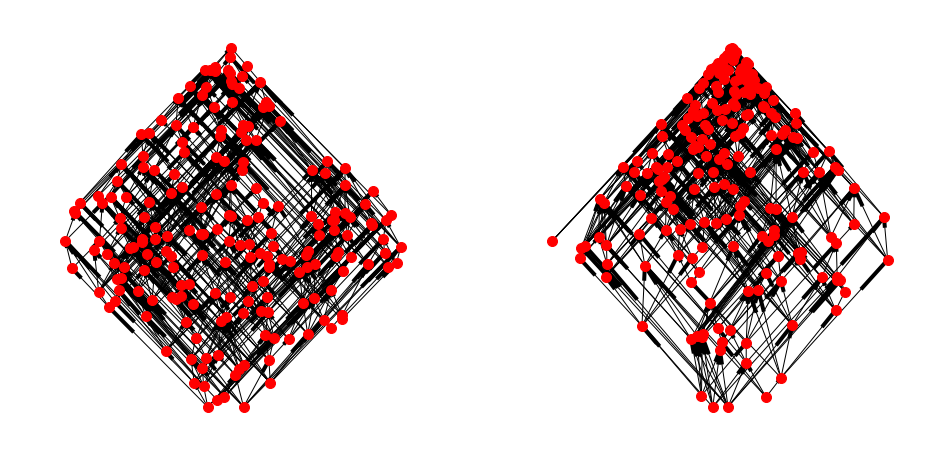

In [21]:
# draw the causal sets
f, axs = plt.subplots(1, 2, figsize=(16,8))
for i, G in enumerate([G_m, G_ds]): 
    draw_pos = {i:G.node[i]['position'][::-1] for i in range(N)}
    nx.draw(nx.transitive_reduction(G), pos=draw_pos, ax=axs[i], node_size=100)

In [ ]:
names = ['Minkowski spacetime', 'de Sitter spacetime']
for i, G in enumerate([G_m, G_ds]):
    print names[i]
    print 'N: ', G.number_of_nodes()
    print 'E: ', G.number_of_edges()
    print 'LP: ' len(nx.dag_longest_path(G))
    for k in [2,3,4]:
        print 'C_%s: ' % k, dag.count_chains(G, k)
        print 'MMD_%s' % k., dag.mmd_estimate(m['C_%s' % k], k, m['N'])
        m['MPSD'] = dag.mpsd(G)

In [ ]:
# measure curvature
chains = (m['N'], m['C_2'], m['C_3'])
initial_guess = [33., 1., 0.2]
m['ds_T'], m['ds_d'], m['ds_K'] = dag.de_sitter_param_estimate(chains, initial_guess)

In [ ]:
m